# _10-amaliy topshiriq_

## 1.Kutubxonalarni import qilish

In [422]:
import numpy as np # chiziqli algebra
import pandas as pd # ma'lumotlarga ishlov berish, CSV faylini kiritish va chiqarish
import matplotlib.pyplot as plt # ma'lumotlarni vizualizatsiya qilish
import seaborn as sns # statistik ma'lumotlarni vizualiazatsiya qilish
%matplotlib inline


## 2. Ma'lumotlar to'plamini import qilish

In [423]:
data = 'data2.csv'
df = pd.read_csv(data)

## 3. Tadqiqot ma'lumotlarini tahlil qilish

In [424]:
df.shape

(87, 7)

Ma'lumotlar to'plamida 104 ta namuna va 5 ta atribut mavjudligini ko'rishimiz mumkin. Ma'lumotlar
to'plami tavsifida ma'lumotlar to'plamida 104 namuna va 5 atribut mavjudligi berilgan. Shunday qilib,
birinchi instantsiya qator sarlavhasi va ma'lumotlar to'plamida 2 ta qo'shimcha atribut mavjud degan
xulosaga kelishimiz mumkin. Keyinchalik, bu haqda ko'proq ma'lumotga ega bo'lish uchun ma'lumotlar
to'plamini ko'rib chiqishimiz kerak.


#### Ma'lumotlar to'plamini ko'rish

In [425]:
df.head()

,qon_bosimi_speed,qon_bosimi_count,xolesterin,bmi,turmush_tarzi,tibbiyot_tarixi,dastlabki_holat
0,130,85,100,18,1,1,1
1,140,99,130,40,0,1,0
2,130,85,100,18,1,1,1
3,140,99,130,40,0,1,0
4,135,82,100,19,1,1,1


## 4-qadam. Belgilar vektori va maqsadli o'zgaruvchini e'lon qilish

In [426]:
X = df
y = df['dastlabki_holat']

## 5-qadam. Kategorik o‘zgaruvchini butun songa aylantirish


In [427]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['dastlabki_holat'] = le.fit_transform(X['dastlabki_holat'])
y = le.transform(y)

In [428]:
X.head()

,qon_bosimi_speed,qon_bosimi_count,xolesterin,bmi,turmush_tarzi,tibbiyot_tarixi,dastlabki_holat
0,130,85,100,18,1,1,1
1,140,99,130,40,0,1,0
2,130,85,100,18,1,1,1
3,140,99,130,40,0,1,0
4,135,82,100,19,1,1,1


In [429]:
X = df
y = df['tibbiyot_tarixi']

In [430]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['tibbiyot_tarixi'] = le.fit_transform(X['tibbiyot_tarixi'])
y = le.transform(y)

In [431]:
X.head()

,qon_bosimi_speed,qon_bosimi_count,xolesterin,bmi,turmush_tarzi,tibbiyot_tarixi,dastlabki_holat
0,130,85,100,18,1,1,1
1,140,99,130,40,0,1,0
2,130,85,100,18,1,1,1
3,140,99,130,40,0,1,0
4,135,82,100,19,1,1,1


## 6-qadam. Belgilarni masshtablash

In [432]:
cols = X.columns

In [433]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [434]:
X.head()

,qon_bosimi_speed,qon_bosimi_count,xolesterin,bmi,turmush_tarzi,tibbiyot_tarixi,dastlabki_holat
0,0.111111,0.1125,0.000000,0.013986,1.0,1.0,1.0
1,0.250000,0.2875,0.142857,0.167832,0.0,1.0,0.0
2,0.111111,0.1125,0.000000,0.013986,1.0,1.0,1.0
3,0.250000,0.2875,0.142857,0.167832,0.0,1.0,0.0
4,0.180556,0.0750,0.000000,0.020979,1.0,1.0,1.0


## 7-qadam. Ikkita klasterli K-Means modeli


In [435]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

## 8-qadam. K-Means model parametrlarini o'qitis

In [436]:
kmeans.cluster_centers_

array([[ 3.51495726e-01,  3.01282051e-01,  2.14896215e-01,
         2.01004124e-01,  1.02564103e-01,  6.41025641e-01,
        -1.11022302e-16],
       [ 1.27604167e-01,  1.37760417e-01,  2.30158730e-02,
         2.75349650e-02,  1.00000000e+00,  9.37500000e-01,
         1.00000000e+00]])

In [437]:
kmeans.inertia_

21.631103728772583

## 9-qadam. Model bo'yicha zaif tasniflash sifatini tekshirish


In [438]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))
print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))

Natija: 87 ta namunadan 55 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.63


## 10-qadam. Klasterlarning optimal sonini topish uchun tirsak usulidan foydalanish

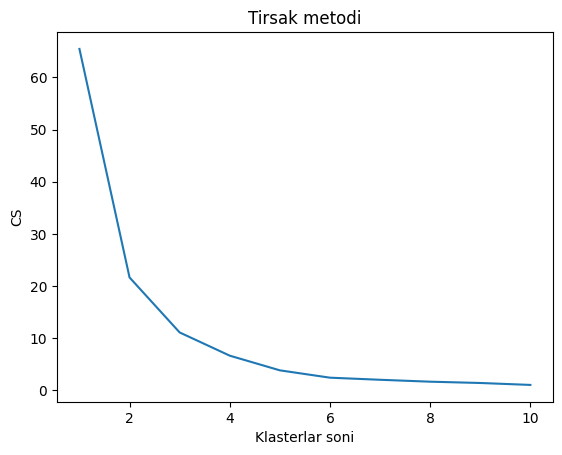

In [439]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Tirsak metodi')
plt.xlabel('Klasterlar soni')
plt.ylabel('CS')
plt.show()

## 11-qadam. Turli klasterlarga ega K-Means modeli

In [440]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
correct_labels = sum(y == labels)

print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 87 ta namunadan 59 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.68


In [441]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 87 ta namunadan 55 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.63


In [442]:
#oxirgi qadam. 
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 87 ta namunadan 55 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.63


Biz nisbatan yuqori aniqlikka erishdik 68% k=2. 
1. Ushbu loyihada K-Means Clustering deb nomlangan eng mashhur nazoratsiz klasterlash texnikasini amalga oshirdik.
2. Tirsak usulini qo'lladik va k=2 (k - klasterlar soni) ushbu ma'lumotlarni klasterlash uchun yaxshi
klaster soni deb hisoblanishi mumkinligini aniqladik.
3. Biz modelning 28.093665731351475 ga teng juda yuqori inersiyaga ega ekanligini aniqladik. Shunday qilib, bu
ma'lumotlarga mos keladigan yaxshi model emas.
4. Bizning nazoratsiz modelimiz tomonidan k=3 bilan 63% tasniflash aniqligiga erishdik.
5. Shunday qilib, k qiymatini o'zgartirdik va nisbatan yuqoriroq tasniflash aniqligini topdik 63% k=4.
6. Demak, k=2 klasterlarning optimal soni degan xulosaga kelishimiz mumkin.
